# Russian film distribution data analysis

The client of the research is the Russian Federation Ministry of Culture.

It is necessary to study the Russian film distribution market and identify current trends. Pay attention to the films that have received government support. Try to answer the question of how interesting such films are to the viewer.

The work takes place with the data published on the portal [open data of the Ministry of Culture] (https://opendata.mkrf.ru/). The data set contains information about distribution certificates, box office and government support for films, as well as information from the KinoPoisk website.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-data" data-toc-modified-id="Introduction-to-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to data</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-types" data-toc-modified-id="Data-types-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data types</a></span></li><li><span><a href="#Gaps" data-toc-modified-id="Gaps-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gaps</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Categorical-columns" data-toc-modified-id="Categorical-columns-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Categorical columns</a></span></li><li><span><a href="#Quantitative-clumns" data-toc-modified-id="Quantitative-clumns-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Quantitative clumns</a></span></li><li><span><a href="#New-columns" data-toc-modified-id="New-columns-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>New columns</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Number-of-films-and-data-quality" data-toc-modified-id="Number-of-films-and-data-quality-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Number of films and data quality</a></span></li><li><span><a href="#Rental-dynamics-by-years" data-toc-modified-id="Rental-dynamics-by-years-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Rental dynamics by years</a></span></li><li><span><a href="#Box-office-average-and-median-by-years" data-toc-modified-id="Box-office-average-and-median-by-years-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Box office average and median by years</a></span></li><li><span><a href="#Study-of-the-age-restrictions-influence" data-toc-modified-id="Study-of-the-age-restrictions-influence-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Study of the age restrictions influence</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Films-that-received-government-support" data-toc-modified-id="Films-that-received-government-support-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Films that received government support</a></span><ul class="toc-item"><li><span><a href="#Additional-data-processing" data-toc-modified-id="Additional-data-processing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Additional data processing</a></span></li><li><span><a href="#Exploratory-analysis" data-toc-modified-id="Exploratory-analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploratory analysis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Research-results" data-toc-modified-id="Research-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Research results</a></span></li></ul></div>

## Introduction to data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
df_movies = pd.read_csv('mkrf_movies_en.csv')
df_shows = pd.read_csv('mkrf_shows.csv')

In [3]:
df_movies = df_movies.drop(columns='Unnamed: 0')
df_movies.info()
df_movies.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,open space,221048915,2015-11-27T12:00:00.000Z,Art,"Touchstone Pictures, Cobalt Pictures, Beacon P...",USA,Kevin Costner,"David Valdes, Kevin Costner, Jake Eberts","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,7.2,"Action, Drama, Melodrama"
1,A very important task,111013716,2016-09-13T12:00:00.000Z,Art,"Film studio ""Mosfilm""",USSR,E.Matveev,NaN,"""6+"" - for children over 6 years old",NaN,NaN,NaN,NaN,6.6,"drama, military"
2,Extremely dangerous,221038416,2016-10-10T12:00:00.000Z,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller"
3,Extremely dangerous,221026916,2016-06-10T12:00:00.000Z,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller"
4,Extremely dangerous,221030815,2015-07-29T12:00:00.000Z,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller"


In [4]:
df_shows.info()
df_shows.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


We need to merge data on the `puNumber` column. In the `shows` df, the data type of this column is `int64`, and in the `movies` df - `srting`. Let's bring the columns to a single type and use the `merge` method.

In [5]:
df_shows['puNumber'] = df_shows['puNumber'].astype('str')
df = df_movies.merge(df_shows, on = 'puNumber', how = 'left')

It is required to check that the merging is done correctly. In the `df_shows` df, the number of rows is 3158. Let's look at the merged df, if everything is correct, the number of rows in the `box_office` column will be equal to `df_shows`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

The merging is done correctly.

### Conclusion

- The data sample is small, we will have to delete and change the data very carefully
- Sample is crilically low on data abour films that have received gouverment support
- There is a lot of gaps in the information about the film fees. It is obvious that the data from the `shows` dataframe is incomplete
- Categorial type columns will be difficult to parse, as the information there is presented as a single row with multiple values
- There are two main indexes in the data - the number of the rental certificate and the title of the film, one of which must be identified as unique and further analysis should be based on it

## Data preprocessing

### Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

The first and most obvious is to change the data type in the `show_start_date` column from `object` to `datetime`

In [8]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%dT12:00:00.000Z')
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,open space,221048915,2015-11-27,Art,"Touchstone Pictures, Cobalt Pictures, Beacon P...",USA,Kevin Costner,"David Valdes, Kevin Costner, Jake Eberts","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,7.2,"Action, Drama, Melodrama",NaN
1,A very important task,111013716,2016-09-13,Art,"Film studio ""Mosfilm""",USSR,E.Matveev,NaN,"""6+"" - for children over 6 years old",NaN,NaN,NaN,NaN,6.6,"drama, military",NaN
2,Extremely dangerous,221038416,2016-10-10,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN
3,Extremely dangerous,221026916,2016-06-10,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN
4,Extremely dangerous,221030815,2015-07-29,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN


In order to investigate the rating, we need to convert the data type to `float`. So we can calculate the average and / or median rating for the sample. Let's see why data has an  `object` type

In [9]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8', '7.8', '8.1', '7.1', '6',
       '7.4', '5.8', '8.7', '6.3', '6.9', '5', '4.3', '7.3', '7', '6.4',
       nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6', '6.5', '2.4',
       '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1', '5.7', '5.4',
       '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8', '4.6',
       '4.8', '4', '3', '1.6', '4.2', '5.2', '4.7', '4.9', '3.9', '2.7',
       '3.3', '2.9', '28%', '3.7', '1.4', '3.1', '97%', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '83%',
       '64%', '91%', '94%', '62%', '79%', '90%', '19%', '88%', '1', '89%',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9', '98%', '8.9', '9.1'],
      dtype=object)

Part of the rating is indicated in numbers from 1 to 9.1, and part in percentages from 0.19 to 0.99. In this case, percentages are defined as `string`. The first assumption is that the percentage rating is the same rating in numbers, only not from 1 to 10, but from 0.1 to 1. Let's take a closer look at this data

In [10]:
df[df.ratings.str.contains('%') & df.ratings.notna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Past,221030715,2015-07-29,Art,"20 Century Fox de Argentina, Chemo, HB Films, ...",Argentina - Brazil,Hector Babenko,"Hector Babenko, Oscar Kramer, Hugo Seedman","""16+"" - for children over 16 years old",NaN,NaN,NaN,NaN,99%,"horror, thriller, drama",NaN
811,By screws!,114000212,2012-08-06,Animated,"CJSC ""Producer center ""Paradise""",Russia,O. Lopato,"G.Nersisyan, A.Manasaryan, A.Nersesyan","""12+"" - for children over 12 years old",NaN,NaN,NaN,NaN,28%,"children's, adventure, comedy",1.740000e+03
1053,Sandman,121029212,2012-11-29,Art,Spotlight Media Production,Switzerland,Peter Louisi,"David Louisi, Peter Louisi","""16+"" - for children over 16 years old",NaN,NaN,NaN,NaN,97%,"horror, sci-fi, fantasy",NaN
1341,Tale of Good and Wre,111008913,2013-11-15,Art,"Non-commercial partnership ""Studio of feature ...",Russia,E. Shilyaeva,K. Tereshchenko,"""6+"" - for children over 6 years old",NaN,NaN,NaN,NaN,99%,"thriller, drama, detective",NaN
1805,Spiral.,111001014,2014-01-30,Art,"LLC ""Company Piton""",Russia,A.Volgin,E. Kovaleva,"""12+"" - for children over 12 years old",NaN,NaN,NaN,NaN,99%,"anime, cartoon, horror",4.295000e+03
1874,Short Love Stories 2,121002615,2015-02-13,Art,"Kaviar, Kurt 13, StreetLight Films, Nayer Deut...",Netherlands - USA - Germany - Canada - France ...,"Matthew Auvro, Leo Bridle, Ben Brand, Den Clar...","Mary Pat Bentel, Ben Brand, Ciara Gillan, Jord...","""18+"" - prohibited for children",NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1899,Cinderella /According to the fairy tale by Cha...,121003615,2015-02-27,Art,"Genre Films, Walt Disney Pictures",USA,Kenneth Branagh,"David Barron, Simon Kinberg, Allison Shearmur","""6+"" - for children over 6 years old",NaN,NaN,NaN,NaN,64%,"musical, fantasy, melodrama",5.287326e+08
2126,trip to mother,111002015,2015-03-02,Art,"CJSC Film Studio ""M""-Film""",Russia,M.Kosyrev-Nesterov,M.Kosyrev-Nesterov,"""16+"" - for children over 16 years old",NaN,NaN,NaN,NaN,91%,"drama, family",0.000000e+00
2146,Main,111003415,2015-03-27,Art,"LLC ""Film studio ""MASTER""",Russia,Yu.Kara,Yu.Kara,"""6+"" - for children over 6 years old",0.0,10000000.0,40000000.0,Ministry of Culture,94%,"fantasy, thriller, comedy",3.347500e+05
2438,The most red fox,111012715,2015-07-30,Art,"LLC ""Producer Center ""Lenfilm""",Russia,A. Strelyanaya,"A. Kotelevsky, E. Pichugin","""6+"" - for children over 6 years old",NaN,NaN,NaN,NaN,62%,"fantasy, family",NaN


Movies are little known and can hardly have a 9.9 from 10 rating, a short research showed that some of these films do not have a rating on Kinopoisk at all. The second hypothesis is that the rating data with percentages is technical data from the Kinopoisk algorithms. In any case, it is safest for analysis to replace it with `NaN`

In [11]:
df['ratings'] = pd.to_numeric(df['ratings'], errors = 'coerce')
df.ratings.describe()

count    6490.000000
mean        6.479245
std         1.101665
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

### Gaps

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

There is quite a few gaps in the data, especially in the `box_office` column. It is not possible to delete it, since in this case there will be very little data for analysis. Substituting values is also not possible, each film is individual and there is no way to take statistics from a larger sample. Moreover, both the presence of data and its absence are of research interest for us.

It makes sense to replace the `NaN` values in the categorical columns with `string` values, such as `no_info`. At the same time, we will leave the values in the `financing_source` column as it is, since the analysis by this column will be carried out only within the sample of films that received government support and, judging by the data, there are no gaps within this sample.

In [13]:
df = df.fillna({
    'film_studio': 'no_info',
    'production_country': 'no_info',
    'director': 'no_info',
    'producer': 'no_info',
    'genres': 'no_info'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

### Duplicates

In [14]:
df[df.duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


There are no obvious duplicates. Let's check for implicit duplicates two columns that can potentially have unique values - the name of the film and the number of the rental certificate.

In [15]:
df.title.value_counts()

Valentine's Day_                                             5
Child of darkness                                            4
time traveler's wife                                         4
Where the monsters live                                      4
Rapunzel: Tangled                                            4
                                                            ..
Mekhabbat - ul yorek eshe (Love is a matter of the heart)    1
Ivan the Terrible - Episode 2 (Restored Version)             1
Ivan the Terrible - 1 episode (restored version)             1
The most true stories                                        1
Song machines. Series "When cacti bloom"                     1
Name: title, Length: 6745, dtype: int64

There are a lot of duplicate movie titles. The description of the case says that one film can have several distribution certificates. It seems that because of this, duplicates appear in the `title` column. Let's check the data in the column with the name of the distribution certificate.

In [16]:
df.puNumber.value_counts()

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: puNumber, Length: 7484, dtype: int64

Only two duplicates and this is a clear mistake. Let's get rid of them and further we will base the analysis considering the value of the `puNumber` column as a unique ID, and we will consider `title` as a categorical column.

In [17]:
df.query('puNumber == "221054410" or puNumber == "221154310"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,How to get married and stay single,221154310,2010-12-17,Art,"She Vam, Script Assosier, Tae Fe 1 Film Produc...",France,Eric Lartigo,"Amandine Bilo, Alan Shaba","""16+"" - for children over 16 years old",NaN,NaN,NaN,NaN,7.0,"melodrama, comedy",NaN
4639,Joanna - a woman on the papal throne /Accordin...,221154310,2010-12-17,Art,"Konstantin Film, A R D Degeto Film, Dune Phyl...",Germany - Great Britain - Italy - Spain,Zenke Wortmann,"Oliver Berben, Doris D. Heinze, Faruk Eltan","""16+"" - for children over 16 years old",NaN,NaN,NaN,NaN,7.6,"drama, melodrama, history",NaN
5067,Analyze it!,221054410,2010-05-25,Art,Warner Bros. Village Roadshow Films LTD,USA-Australia,Harold Ramis,"Jane Rosenthal, Paula Weinstein","""16+"" - for children over 16 years old",NaN,NaN,NaN,NaN,7.4,"comedy,crime",NaN
5068,Analyze it!,221054410,2010-05-25,Art,"Warner Bros., Village Roadshow Pictures, NP En...",USA,Harold Reimis,"Jane Rosenthal, Paul Weinstein","""12+"" - for children over 12 years old",NaN,NaN,NaN,NaN,6.8,"comedy,crime",NaN


In [18]:
df = df.drop([4639, 5068])
df.puNumber.value_counts()

221048915    1
124000611    1
121014511    1
121014411    1
121015211    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: puNumber, Length: 7484, dtype: int64

### Categorical columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7484 non-null   object        
 1   puNumber               7484 non-null   object        
 2   show_start_date        7484 non-null   datetime64[ns]
 3   type                   7484 non-null   object        
 4   film_studio            7484 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7484 non-null   object        
 7   producer               7484 non-null   object        
 8   age_restriction        7484 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

The biggest problem with categorical values is that they are an array of many values in one cell. This makes them difficult for technical analysis. We need to analyze the data on the `age_restriction` column, we will change the values of this column to simpler ones, removing all unnecessary.

In [20]:
df.age_restriction.value_counts()

"16+" - for children over 16 years old    2850
"18+" - prohibited for children           1605
"12+" - for children over 12 years old    1592
"0+" - for any audience                    811
"6+" - for children over 6 years old       626
Name: age_restriction, dtype: int64

In [21]:
df = df.replace({
    '"16+" - for children over 16 years old': '16+',
    '"18+" - prohibited for children': '18+',
    '"12+" - for children over 12 years old': '12+',
    '"0+" - for any audience': '0+',
    '"6+" - for children over 6 years old': '6+'
})

df.age_restriction.value_counts()

16+    2850
18+    1605
12+    1592
0+      811
6+      626
Name: age_restriction, dtype: int64

Let's look at the `type` column 

In [22]:
df.type.value_counts()

Art                        4518
 Art                       1389
Animated                    828
Other                       406
Documentary                 288
Popular science              53
 Animated                     1
Music and entertainment       1
Name: type, dtype: int64

There are gaps in the category names, we will get rid of them.

In [23]:
df['type'] = df['type'].str.strip()
df.type.value_counts()

Art                        5907
Animated                    829
Other                       406
Documentary                 288
Popular science              53
Music and entertainment       1
Name: type, dtype: int64

In [24]:
df.financing_source.value_counts()

Ministry of Culture                 164
Cinema Fund                         146
Ministry of Culture, Cinema Fund     22
Name: financing_source, dtype: int64

The `financing_source` column is the only categorical column with almost no problems. The double mention of the Ministry of Culture and the Cinema Fund can be considered as "*co-financing*" category

### Quantitative clumns

It is necessary to carefully examine the data on films that have received state support. The documentation also state that the film's budget should already contain the support amount. Let's check if this requirement is met.

In [25]:
df['wrong_budget'] = (df['refundable_support'] + df['nonrefundable_support']) > df['budget']
df.wrong_budget.value_counts()

False    7467
True       17
Name: wrong_budget, dtype: int64

17 rows were found where the budget is less than the state support, which is an obvious error. Let's look at these values

In [26]:
df.query('wrong_budget == True')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,wrong_budget
2053,14+,111023614,2014-12-19,Art,"LLC Film Studio ""September""",Russia,A.Zaitsev,"O. Granina, A. Zaitsev",16+,0.0,23000000.0,0.0,"Ministry of Culture, Cinema Fund",6.6,melodrama,1.023402e+07,True
2058,Duxless 2,111000415,2015-01-26,Art,"""Slovo Film Studio"" LLC, ""Art Pictures Studio""...",Russia,R. Prygunov,"P. Anurov, F. Bondarchuk, D. Rudovsky",16+,0.0,75000000.0,0.0,Cinema Fund,6.6,drama,4.461635e+08,True
2472,Warrior (2015),111017315,2015-09-28,Art,"OOO ""Forpost Production"", OOO ""Art Pictures St...",Russia,A.Andrianov,"LLC ""Art Pictures Studio""",12+,10000000.0,70000000.0,0.0,Cinema Fund,7.8,"action, drama, crime",1.965724e+08,True
2532,Bartender.,111009615,2015-05-26,Art,"JSC ""White Media"", LLC ""Art Pictures Studio""",Russia,D. Shturmanova,T. Weinstein,16+,20000000.0,0.0,0.0,Cinema Fund,6.2,"comedy, fantasy",6.741897e+07,True
2615,Savva. Warrior heart,114001715,2015-07-21,Animated,"Glucose Production LLC, Art Pictures Studio LLC",Russia,M. Fadeev,A. Chistyakov,6+,60000000.0,100000000.0,0.0,Cinema Fund,4.6,"cartoon, adventure, fantasy",1.844876e+08,True
2684,rag union,111010215,2015-06-08,Art,"LLC ""Film company"" KOKTEBEL """,Russia,M. Mestetskiy,"R. Borisevich, A. Kushaev",18+,0.0,59000000.0,0.0,Cinema Fund,6.3,"comedy, drama",1.957739e+06,True
2788,I will get married soon,111017115,2015-09-30,Art,"JSC ""White Media"", LLC ""Art Pictures Studio""",Russia,S Chekalov,"F. Bondarchuk, T. Weinstein, D. Rudovsky",16+,0.0,35000000.0,0.0,Cinema Fund,5.1,"comedy, melodrama",7.293778e+07,True
2874,I remember - I don't remember!,111004916,2016-03-01,Art,"LLC ""KinoFirma""",Russia,V. Rovensky,"LLC ""KinoFirma""",12+,0.0,6000000.0,0.0,Ministry of Culture,4.3,comedy,1.536293e+07,True
3047,Love with limits,111008216,2016-04-29,Art,"JSC ""White Media"", LLC ""Art Pictures Studio""",Russia,D. Tyurin,"F. Bondarchuk, T. Weinstein, D. Rudovsky",16+,19000000.0,51000000.0,0.0,Cinema Fund,6.3,"comedy, melodrama",7.029905e+07,True
3565,Attraction (2016),111018116,2016-12-16,Art,"Hydrogen 2011 LLC, Art Pictures Studio LLC",Russia,F. Bondarchuk,"LLC ""Art Pictures Studio""",12+,0.0,250000000.0,0.0,Cinema Fund,5.6,fiction,1.038321e+09,True


All values in the `budget` column are null. This is an error that looks like either a gap or a technical error, meaning that the film's budget is only government support. One way or another, it is best from the analysis point of view to fill the values with the sum of the column values `refundable_support` and `nonrefundable_support`

In [27]:
df['budget'] = df['budget'].mask(df['budget'] == 0, df['refundable_support'] + df['nonrefundable_support'])
df.query('wrong_budget == True')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,wrong_budget
2053,14+,111023614,2014-12-19,Art,"LLC Film Studio ""September""",Russia,A.Zaitsev,"O. Granina, A. Zaitsev",16+,0.0,23000000.0,23000000.0,"Ministry of Culture, Cinema Fund",6.6,melodrama,1.023402e+07,True
2058,Duxless 2,111000415,2015-01-26,Art,"""Slovo Film Studio"" LLC, ""Art Pictures Studio""...",Russia,R. Prygunov,"P. Anurov, F. Bondarchuk, D. Rudovsky",16+,0.0,75000000.0,75000000.0,Cinema Fund,6.6,drama,4.461635e+08,True
2472,Warrior (2015),111017315,2015-09-28,Art,"OOO ""Forpost Production"", OOO ""Art Pictures St...",Russia,A.Andrianov,"LLC ""Art Pictures Studio""",12+,10000000.0,70000000.0,80000000.0,Cinema Fund,7.8,"action, drama, crime",1.965724e+08,True
2532,Bartender.,111009615,2015-05-26,Art,"JSC ""White Media"", LLC ""Art Pictures Studio""",Russia,D. Shturmanova,T. Weinstein,16+,20000000.0,0.0,20000000.0,Cinema Fund,6.2,"comedy, fantasy",6.741897e+07,True
2615,Savva. Warrior heart,114001715,2015-07-21,Animated,"Glucose Production LLC, Art Pictures Studio LLC",Russia,M. Fadeev,A. Chistyakov,6+,60000000.0,100000000.0,160000000.0,Cinema Fund,4.6,"cartoon, adventure, fantasy",1.844876e+08,True
2684,rag union,111010215,2015-06-08,Art,"LLC ""Film company"" KOKTEBEL """,Russia,M. Mestetskiy,"R. Borisevich, A. Kushaev",18+,0.0,59000000.0,59000000.0,Cinema Fund,6.3,"comedy, drama",1.957739e+06,True
2788,I will get married soon,111017115,2015-09-30,Art,"JSC ""White Media"", LLC ""Art Pictures Studio""",Russia,S Chekalov,"F. Bondarchuk, T. Weinstein, D. Rudovsky",16+,0.0,35000000.0,35000000.0,Cinema Fund,5.1,"comedy, melodrama",7.293778e+07,True
2874,I remember - I don't remember!,111004916,2016-03-01,Art,"LLC ""KinoFirma""",Russia,V. Rovensky,"LLC ""KinoFirma""",12+,0.0,6000000.0,6000000.0,Ministry of Culture,4.3,comedy,1.536293e+07,True
3047,Love with limits,111008216,2016-04-29,Art,"JSC ""White Media"", LLC ""Art Pictures Studio""",Russia,D. Tyurin,"F. Bondarchuk, T. Weinstein, D. Rudovsky",16+,19000000.0,51000000.0,70000000.0,Cinema Fund,6.3,"comedy, melodrama",7.029905e+07,True
3565,Attraction (2016),111018116,2016-12-16,Art,"Hydrogen 2011 LLC, Art Pictures Studio LLC",Russia,F. Bondarchuk,"LLC ""Art Pictures Studio""",12+,0.0,250000000.0,250000000.0,Cinema Fund,5.6,fiction,1.038321e+09,True


Now let's look at the rest of the quantitative values ​​(and remove the `wrong_budget` column since we don't need it anymore)

In [28]:
df = df.drop(columns = ['wrong_budget'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.00,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,30000000.00,4.037500e+07,4.000000e+08
budget,332.0,1.314224e+08,1.871482e+08,6000000.0,45524799.5,71196901.50,1.500000e+08,2.305074e+09
ratings,6488.0,6.479023e+00,1.101740e+00,1.0,5.9,6.60,7.200000e+00,9.200000e+00
box_office,3158.0,7.647870e+07,2.403531e+08,0.0,86239.0,2327987.55,2.397967e+07,3.073569e+09


We don’t need a scientific way for numbers here, let’s change them

In [29]:
pd.options.display.float_format = '{:,.1f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.0,"11,864,457.8","24,916,555.3",0.0,0.0,0.0,"15,000,000.0","180,000,000.0"
nonrefundable_support,332.0,"48,980,988.9","59,980,117.9",0.0,"25,000,000.0","30,000,000.0","40,375,000.0","400,000,000.0"
budget,332.0,"131,422,395.8","187,148,242.7","6,000,000.0","45,524,799.5","71,196,901.5","150,000,000.0","2,305,074,303.0"
ratings,"6,488.0",6.5,1.1,1.0,5.9,6.6,7.2,9.2
box_office,"3,158.0","76,478,696.2","240,353,122.8",0.0,"86,239.0","2,327,987.5","23,979,671.0","3,073,568,690.8"


Much better. We will take the state support columns as is, the column with ratings shows normal values. But the data in `box_office` behaves strangely.

- Zero fees are indicated, this is strange, it looks like gaps
- The mean differs from the median by more than 30 times

Let's look at zero values

In [30]:
df.query('box_office == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Anna Pavlova,111011013,2013-12-19,Art,"co-production Film studio ""Mosfilm"", ""Cosmos-f...","USSR, France, England, Cuba, East Germany",Emil Loteanu,no_info,6+,NaN,NaN,NaN,NaN,7.7,"drama, biography, music",0.0
237,Wounded animals,111007613,2013-10-18,Art,"Film studio ""Mosfilm""",USSR,N. Gubenko,no_info,12+,NaN,NaN,NaN,NaN,8.2,drama,0.0
596,The smell of heather,111003012,2012-05-23,Art,"OOO ""Studio RIM""",Russia,A. Magomedov,"M.Balashova, E.Mironov",16+,NaN,NaN,NaN,NaN,6.3,comedy,0.0
914,In the Fog /According to the story of the same...,121027712,2012-11-07,Art,"Ma Ya De Fiction, Lemming Film, Belarusfilm, ...",Germany - Netherlands - Belarus - Russia - Latvia,Sergey Loznitsa,Heino Deckert,12+,NaN,NaN,NaN,NaN,6.5,"drama, military, history",0.0
932,Letter to Momo,124002912,2012-10-25,Animated,"Kadokawa Pictures, Productions I G, Tokyo Broa...",Japan,Okiura Hiroyuki,"Hiroyuki Ikeda, Mitsuhisa Ishikawa, Kazuya Hamana",12+,NaN,NaN,NaN,NaN,7.4,"anime,cartoon,drama",0.0
933,Summer Wars,124002812,2012-10-25,Animated,"Medhouse, Nippon Television Network Corporatio...",Japan,Mamoru Hosoda,"Takafumi Watanabe, Takuya Ito, Seiji Okuda, Y...",12+,NaN,NaN,NaN,NaN,7.7,"anime,cartoon,fantasy",0.0
976,Garegin Nzhdeh,131000213,2013-04-23,Art,"AJK Productions, Pan Armenian Media Group",Armenia,Hrach Keshishyan,Hrach Keshishyan,12+,NaN,NaN,NaN,NaN,7.9,biography,0.0
1126,Marathon,111006712,2012-12-18,Art,"LLC ""Cinema Art Studio""",Russia,K. Hovhannisyan,K. Hovhannisyan,16+,NaN,NaN,NaN,NaN,5.5,"comedy, melodrama",0.0
1387,Exam for two /According to the novel by Jean H...,121014613,2013-06-11,Art,Depf of the Field,USA,Paul Weitz,"Paul Weitz, Kerry Kohansky, Andrew Miano",12+,NaN,NaN,NaN,NaN,5.8,"melodrama, comedy, drama",0.0
1559,"Mr. Morgan's last love /Based on the novel ""Te...",121002614,2014-02-11,Art,"Kaminsky Shtim Film, Bavaria Pictures, Senator...",Germany - Belgium - USA - France,Sandra Nettelbeck,"Frank Kaminsky, Astrid Kamke, Philipp Kreuzer,...",16+,NaN,NaN,NaN,NaN,6.9,drama,0.0


The films are little known, perhaps the rental certificates were not obtained for commercial use, or there is an data error. We will not delete the rows, since the rest of the data may be useful for the analysis. At the same time, it is impossible to replace zero values with `NaN`, this will distort the statistics. Let's dwell on the hypothesis that zero values indicate rental certificates received for non-commercial screenings.

In [31]:
df.query('box_office > 0').describe().T

,count,mean,std,min,25%,50%,75%,max
refundable_support,318.0,"11,946,540.9","24,817,662.2",0.0,0.0,0.0,"15,000,000.0","180,000,000.0"
nonrefundable_support,318.0,"48,780,403.5","57,792,390.6",0.0,"25,000,000.0","30,000,000.0","44,125,000.0","400,000,000.0"
budget,318.0,"132,006,722.1","184,957,591.6","6,000,000.0","46,153,856.2","74,955,000.0","150,006,429.8","2,305,074,303.0"
ratings,"2,880.0",6.3,1.1,1.0,5.7,6.4,7.1,9.2
box_office,"3,134.0","77,064,365.8","241,178,383.8",40.0,"101,028.8","2,409,099.4","24,569,794.9","3,073,568,690.8"


It didn't get any clearer. Box office range from 40 to 3 billion rubles. Let's look at the values in the first and last quantiles, try to understand why the data behaves this way

In [32]:
df.query('box_office < 100000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Love and pigeons,111007013,2013-10-18,Art,"Film studio ""Mosfilm""",USSR,V. Menshov,no_info,12+,NaN,NaN,NaN,NaN,8.3,"melodrama, comedy","2,700.0"
18,Unyielding,111003616,2016-02-12,Art,"Film studio ""Mosfilm""",USSR,Y. Chulyukin,no_info,6+,NaN,NaN,NaN,NaN,8.0,"melodrama, comedy",360.0
19,Out of jurisdiction,111003716,2016-02-12,Art,"Film studio ""Mosfilm""",USSR,"V.Krasnopolsky, V.Uskov",no_info,6+,NaN,NaN,NaN,NaN,7.7,drama,420.0
22,"Operation ""Y"" and Shurik's other adventures",111007413,2013-10-18,Art,"Film studio ""Mosfilm""",USSR,L. Gaidai,no_info,6+,NaN,NaN,NaN,NaN,8.7,"comedy, melodrama, crime",380.0
38,Guys!..,111007213,2013-10-18,Art,"Film studio ""Mosfilm""",USSR,I. Babich,no_info,6+,NaN,NaN,NaN,NaN,8.1,drama,"1,165.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,Created in the Abyss - Rogue Twilight,124006219,2019-08-15,Animated,Kinema Citrus Co.,Japan,Masayuki Kojima,Muneki Ogasawara,18+,NaN,NaN,NaN,NaN,8.0,"anime,cartoon,detective","73,700.0"
7155,Created in the Abyss - Dawn of the Journey,124006319,2019-08-15,Animated,Kinema Citrus Co.,Japan,Masayuki Kojima,Muneki Ogasawara,16+,NaN,NaN,NaN,NaN,7.9,"anime,cartoon,detective","75,300.0"
7205,Diego Maradona,126003519,2019-09-14,Other,"Film Fo, Lorton Entertainment, Corner Films",Great Britain,Asif Kapadia,"James Gay-Rees, Paul Martin",16+,NaN,NaN,NaN,NaN,7.7,"documentary, sports, biography","38,330.0"
7421,Ballet today,126007219,2019-12-01,Other,"Dogwoof Film Distribution, Lexicat Artists, St...",USA,Stephen Cantor,"P.J.Allen, A.Blavatnik, O.Blavatnik, D.Gargi, ...",16+,NaN,NaN,NaN,NaN,NaN,no_info,"59,829.0"


In [33]:
df.query('box_office > 30000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1857,Shaun the sheep.,124000815,2015-02-17,Animated,"Ardman Animation, Anton Capital Entertainment,...",UK - France,Mark Burton,"Julie Lockhart, Peter Lord, Nick Park",6+,NaN,NaN,NaN,NaN,7.4,"cartoon,fantasy,comedy","57,395,723.1"
1865,The universe of Stephen Hawking /According to ...,121002415,2015-02-11,Art,Working Title Films,Great Britain,James Marsh,"Tim Bevan, Lisa Bruce",16+,NaN,NaN,NaN,NaN,7.9,"biography, melodrama, drama","39,229,270.6"
1869,Women versus men,111002415,2015-03-12,Art,"OOO ""Enjoy Movies""",Russia,"T.Mammadov, S.Andreasyan","G. Andreasyan, S. Andreasyan, V. Polyakov",18+,NaN,NaN,NaN,NaN,3.7,comedy,"126,148,703.6"
1870,And the dawns here are quiet..._,111002915,2015-03-16,Art,"LLC ""Company ""Real-Dakota""",Russia,R. Davletyarov,no_info,12+,"50,000,000.0","100,000,000.0","220,588,394.0",Cinema Fund,8.5,"drama, military, history","249,166,767.7"
1877,"Sniper /Based on the book by Chris Kyle, Scott...",121003115,2015-02-20,Art,"Warner Bros., Village Roadshow Pictures, Mad C...",USA,Clint Eastwood,"Clint Eastwood, Andrew Lazar, PJ A",18+,NaN,NaN,NaN,NaN,7.0,"Action, Drama, War","44,279,440.2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,Motherless Brooklyn,121036119,2019-12-05,Art,"Class 5 Films, MD Double You AM Studios, Warne...",USA,Edward Norton,"Michael Bederman, Bill Miglior, Edward Norton,...",18+,NaN,NaN,NaN,NaN,7.0,"drama, crime, detective","64,137,345.0"
7453,Fixies against crabs,114004819,2019-12-21,Animated,"JSC ""Airplane""",Russia,"V.Bedoshvili, O.Uzhinov, I.Pshonkin, D.Tsybulkin","G.Vasiliev, S.Sarkisov, I.Popov",6+,"80,000,000.0","40,000,000.0","270,000,000.0",Cinema Fund,7.5,"cartoon, children's, adventure","387,590,521.7"
7456,serf,111021719,2019-12-19,Art,"LLC ""MEM-MEDIA"" by order of JSC ""WBD Group""",Russia,K. Shipenko,"E. Iloyan, D. Zhalinsky, V. Dusmukhametov, T. ...",12+,"25,000,000.0","35,000,000.0","160,000,000.0",Cinema Fund,6.8,comedy,"3,073,568,690.8"
7464,Union of Salvation,111022019,2019-12-26,Art,CJSC Cinema Directorate,Russia,A.Kravchuk,"A.Maximov, K.Ernst",12+,"100,000,000.0","400,000,000.0","980,000,000.0",Cinema Fund,6.0,"history, biography, drama","717,703,185.5"


That makes sens, in the first quintile there are old and little-known films, in the last - modern and popular ones. Apparently, there are rental market rules and categories of films that are unknown to us, it is safer to leave the data as it is and continue to analyze this indicator further.

### New columns

Adding a column with the year

In [34]:
df['year'] = df['show_start_date'].dt.year
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,open space,221048915,2015-11-27,Art,"Touchstone Pictures, Cobalt Pictures, Beacon P...",USA,Kevin Costner,"David Valdes, Kevin Costner, Jake Eberts",18+,NaN,NaN,NaN,NaN,7.2,"Action, Drama, Melodrama",NaN,2015
1,A very important task,111013716,2016-09-13,Art,"Film studio ""Mosfilm""",USSR,E.Matveev,no_info,6+,NaN,NaN,NaN,NaN,6.6,"drama, military",NaN,2016
2,Extremely dangerous,221038416,2016-10-10,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...",18+,NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN,2016
3,Extremely dangerous,221026916,2016-06-10,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...",18+,NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN,2016
4,Extremely dangerous,221030815,2015-07-29,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...",18+,NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN,2015


Adding columns with main genre and director

In [35]:
df['main_genre'] = df['genres'].apply(lambda x: x.split(r',')[0])
df['main_director'] = df['director'].apply(lambda x: x.split(r',')[0])
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director
0,open space,221048915,2015-11-27,Art,"Touchstone Pictures, Cobalt Pictures, Beacon P...",USA,Kevin Costner,"David Valdes, Kevin Costner, Jake Eberts",18+,NaN,NaN,NaN,NaN,7.2,"Action, Drama, Melodrama",NaN,2015,Action,Kevin Costner
1,A very important task,111013716,2016-09-13,Art,"Film studio ""Mosfilm""",USSR,E.Matveev,no_info,6+,NaN,NaN,NaN,NaN,6.6,"drama, military",NaN,2016,drama,E.Matveev
2,Extremely dangerous,221038416,2016-10-10,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...",18+,NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN,2016,fantasy,Timur Bekmambetov
3,Extremely dangerous,221026916,2016-06-10,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...",18+,NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN,2016,fantasy,Timur Bekmambetov
4,Extremely dangerous,221030815,2015-07-29,Art,"Universal Pictures, Kickstart Productions, Mar...",USA,Timur Bekmambetov,"Jim Lemley, Jason Noether, Mark E. Platt, Iain...",18+,NaN,NaN,NaN,NaN,6.8,"fantasy, action, thriller",NaN,2015,fantasy,Timur Bekmambetov


Let's calculate government support share of total film budget.

In [36]:
df['support_ratio'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget'] * 100
df['support_ratio'] = df['support_ratio'].round(1)
df[df['budget'].notna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director,support_ratio
1281,While still alive,111005313,2013-10-11,Art,ANO promoting the development of cinematograph...,Russia,A. Atanesyan,"A.Atanesyan, M.Babakhanov, R.Butko",16+,0.0,"26,500,000.0","79,411,900.0",Ministry of Culture,8.1,"drama, melodrama","365,353.6",2013,drama,A. Atanesyan,33.4
1448,Inglourious assholes,111003314,2014-03-28,Art,"OOO ""Company"" ATK-Studio """,Russia,A.Yakimchuk,A. Tyutryumov,12+,0.0,"26,000,000.0","37,142,857.0",Ministry of Culture,NaN,no_info,"28,140.0",2014,no_info,A.Yakimchuk,70.0
1498,Invisibles,111004213,2013-09-10,Art,"LLC ""Company ""REAL-DAKOTA""",Russia,"R.Davletyarov, S.Komarov","R.Davletyarov, A.Kotelevsky, A.Oleynikov",12+,0.0,"107,847,945.0","176,023,490.0",Cinema Fund,5.3,"comedy, fantasy","19,957,031.5",2013,comedy,R.Davletyarov,61.3
1524,BELTS,111004314,2014-05-05,Art,"OOO ""Studio ""Passenger""",Russia,E. Mindadze (pseudonym Katya Shagalova),L.Antonova,16+,0.0,"28,000,000.0","40,574,140.0",Ministry of Culture,4.2,drama,"55,917.5",2014,drama,E. Mindadze (pseudonym Katya Shagalova),69.0
1792,Brothers Ch,111004414,2014-04-23,Art,"OOO ""Studio ""Passenger""",Russia,M.Ugarov,"A.Mindadze, L.Antonova",16+,0.0,"25,000,000.0","40,015,122.0",Ministry of Culture,6.4,drama,"232,100.0",2014,drama,M.Ugarov,62.5


### Conclusion

- Changed data type to `datetime` in `show_start_date` column
- Weird data with percentages in the `ratings` column was found. Decided to delete values ​​without deleting rows
- Replaced gaps in `film_studio` `production_country` `director producer` `genres` columns with `no_info`. Gaps in quantitative columns are left by `NaN` values
- The `title` column has duplicates due to the fact that one movie can have multiple distribution licenses. Decided to consider this column categorical
- The `puNumber` column is treated as a column with a unique rental identifier. Removed two duplicates.
- In the `age_restriction` column, the data has been replaced with a shortened version
- Removed spaces in `type` column in category names
- In the `budget` column, zero values ​​are replaced by the sum of the value from the government support columns
- Strange values ​​found in `box_office` column. It was not possible to find the reasons for this behavior of the data, it was decided to continue the analysis in Step 3
- Added `year` column - with the year the rental started
- Added `main_director` column - with the first director's first and last names
- Added `main_genre` column - with first movie genre title
- Added column `support_ratio` - the share of state support in the total budget of the film

## Exploratory data analysis

### Number of films and data quality

We need to look at how many films were released each year. Release data is not available for all films. It is also necessary to calculate the proportion of films with the specified rental information

Let's complete the task by building a bar plot

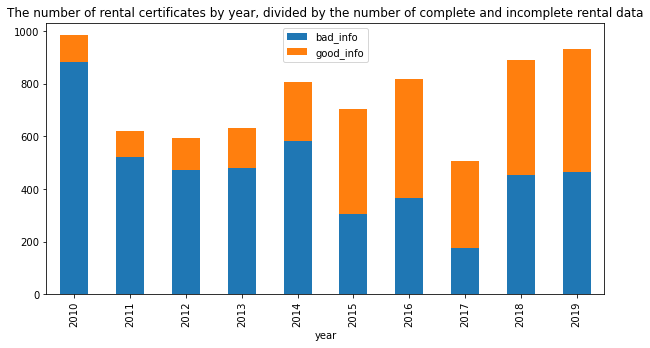

In [37]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

df_for_barplot = df[['year', 'film_studio', 'production_country', 'director', 'producer', 'ratings', 'genres', 'box_office']].copy()

df_for_barplot['check'] = df_for_barplot.apply(lambda x: x.isna() if x.dtype == 'float64' else x == 'no_info').sum(axis = 1)

df_for_barplot.loc[df_for_barplot.check == 0, 'good_info'] = 1
df_for_barplot.loc[df_for_barplot.check > 0, 'bad_info'] = 1

df_for_barplot.pivot_table(index = 'year', values = ['good_info', 'bad_info'], aggfunc = 'sum').plot.bar(stacked=True, figsize = (10, 5), title =  'The number of rental certificates by year, divided by the number of complete and incomplete rental data')
plt.show()

- Most rental certificates were issued in 2010, the least in 2017
- Since 2014, a leap in the quality of film data is obvious, more than half of the rentals in the range from 2015 to 2019 have complete data, until 2015 this figure is less than 25%

It is require to calculate how many films were released each year, let's do it. Since the absence of data does not mean that the film has not been released, the number of lines for each year can be counted.

In [38]:
df.pivot_table(index = 'year', values = 'title', aggfunc = 'count').T

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,983,622,593,630,807,705,818,505,891,930


We also need to calculate how many films had box office for each year, for this we will count the number of rows by year, where the `box_office` indicator is more than 0

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,101,109,123,179,273,462,525,357,475,530


<AxesSubplot:xlabel='year'>

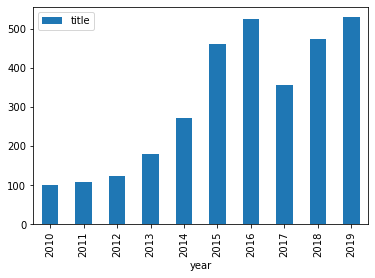

In [39]:
display(df.query('box_office > 0').pivot_table(index = 'year', values = 'title', aggfunc = 'count').T)
df.query('box_office > 0').pivot_table(index = 'year', values = 'title', aggfunc = 'count').plot.bar()

Least of all films that received a rental certificate and had not zero box office were in 2010-2012. From 2010 to 2016 from 101 films to 525 respectively we see an increase.

### Rental dynamics by years

It is necessary to study how the dynamics of rental has changed over the years. In what year was the minimum and maximum box office.

Let's build a bar plot 

<AxesSubplot:title={'center':'Box office by year'}, xlabel='year'>

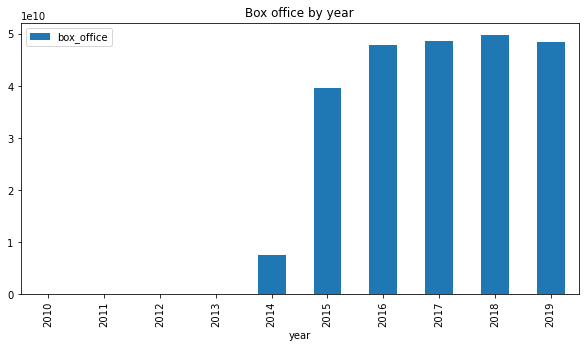

In [40]:
df.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum').plot.bar(figsize = (10, 5), title = 'Box office by year')

Given the previous research results, it looks like the answer to the question about the strange `box_office` data has been found. Until 2014, the data is bad, there are a lot of gaps and the box office data shows the same dynamics. Let's study the data before 2014 and after.

In [41]:
df.query('year < 2015 and box_office > 0').box_office.describe()

count             785.0
mean        9,551,896.1
std        73,209,935.8
min                40.0
25%             1,000.0
50%             5,250.0
75%            37,985.0
max     1,016,410,635.3
Name: box_office, dtype: float64

In [42]:
df.query('year > 2014 and box_office > 0').box_office.describe()

count           2,349.0
mean       99,626,004.3
std       271,645,223.2
min               100.0
25%         1,255,719.0
50%         5,872,718.3
75%        46,319,097.4
max     3,073,568,690.8
Name: box_office, dtype: float64

It seems that somewhere during 2014 there was a change in the way of collecting information and data that was indicated in thousands began to be indicated in numbers. But that doesn't explain the unusually low box office. It looks like some of the rental certificates were not used or the screenings were not commercial. One way or another, this does not affect the amount of fees that we are currently studying.

Let's look at the data on box office from 2015 to 2019

In [43]:
df.query('year > 2014').pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')

,box_office
year,
2015,"39,497,365,196.4"
2016,"47,866,299,741.9"
2017,"48,563,707,217.5"
2018,"49,668,403,134.3"
2019,"48,425,708,779.6"


The minimum box office is observed in 2015, maximum in 2018.

### Box office average and median by years

With a pivot table, we need to calculate the average and median amount of fees for each year.

In [44]:
df_box_office = df.pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean', 'median'])
df_box_office.columns = ['mean_box_office', 'median_box_office']
df_box_office['dev'] = df_box_office['mean_box_office'] - df_box_office['median_box_office']
df_box_office['dev%'] = df_box_office['dev'] / df_box_office['mean_box_office'] * 100
df_box_office

,mean_box_office,median_box_office,dev,dev%
year,,,,
2010,"23,130.0","1,700.0","21,430.0",92.7
2011,"129,383.2","3,000.0","126,383.2",97.7
2012,"54,339.2","5,660.0","48,679.2",89.6
2013,"161,954.9","3,522.5","158,432.4",97.8
2014,"26,684,415.3","18,160.0","26,666,255.3",99.9
2015,"84,940,570.3","4,920,933.0","80,019,637.3",94.2
2016,"91,000,569.9","3,846,679.4","87,153,890.4",95.8
2017,"136,032,793.3","9,968,340.0","126,064,453.3",92.7
2018,"104,565,059.2","8,891,102.2","95,673,957.0",91.5


The percentage deviation of the median from the mean for each year is very similar, which confirms the hypothesis that the method of data entry changed during 2014. This knowledge will be useful to us in the study of films that received government support. From the data, there are still different types of rental licenses and their uses that we don't know about.

According to the average and median, the economic efficiency of rolled products can be graded as follows:

1st place 2017

2nd place 2018

3rd place 2016 and 2019

4th place 2015

### Study of the age restrictions influence

It is necessary to determine whether the age restrictions (“6+”, “12+”, “16+”, “18+”, etc.) affects the box office of the film in the period from 2015 to 2019. Also, films with what age restrictions have the most box office, does the picture change depending on the year and if so, guess what this might be connected with.

,box_office,ratio
age_restriction,,
0+,"809,077,426.0",0.3
18+,"40,759,615,572.1",17.4
6+,"55,798,610,799.7",23.8
12+,"60,619,446,628.3",25.9
16+,"76,034,733,643.6",32.5


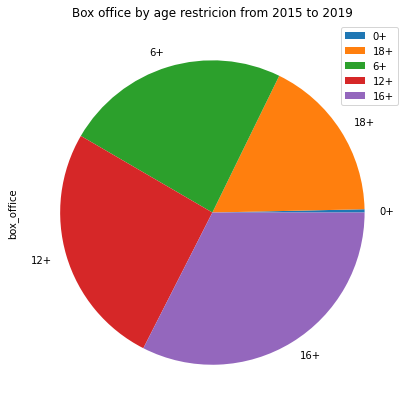

In [45]:
df_age = df.query('year > 2014').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = sum).sort_values(by = 'box_office')
df_age.plot.pie(y = 'box_office', figsize = (7, 7), title = 'Box office by age restricion from 2015 to 2019')
df_age['ratio'] = df_age['box_office'] / df_age.box_office.sum() * 100
df_age

From 2015 to 2019, films with a 16+ age restriction have collected the most - 76 billion or 32% of total box office, and films with a 0+ limit have only 0.3%. Films rated 6+ and 12+ have similar box office numbers of 24% and 26% respectively. Movies rated 18+ made 17.4% or 40 billion.

This distribution is explained quite logically. Movies 16+ are the most popular, since it is a restriction that all creators of "adult" content are trying to get in order not to get 18+ restriction. For the same reason, 18+ films have rather small box office. Films 6+ and 12+ belong to the categories of films that can be shown to children who already can and love to go to the cinema. Films 0+ have a small target audience in cinemas and are therefore the least popular.

,2015 sum,2015 %,2016 sum,2016 %,2017 sum,2017 %,2018 sum,2018 %,2019 sum,2019 %
age_restriction,,,,,,,,,,
0+,"379,054,578.4",1.0,"150,228,848.7",0.3,"229,598,930.0",0.5,"32,449,002.1",0.1,"17,746,066.8",0.0
12+,"13,616,082,008.9",34.5,"12,204,446,524.4",25.5,"7,851,427,660.7",16.2,"14,267,291,660.7",28.7,"12,680,198,773.7",26.2
16+,"11,368,120,870.3",28.8,"16,664,548,541.7",34.8,"18,745,042,900.1",38.6,"16,503,602,347.0",33.2,"12,753,418,984.6",26.3
18+,"5,432,308,367.4",13.8,"6,793,929,818.9",14.2,"9,651,495,581.0",19.9,"8,760,085,501.1",17.6,"10,121,796,303.6",20.9
6+,"8,701,799,371.4",22.0,"12,053,146,008.2",25.2,"12,086,142,145.8",24.9,"10,104,974,623.4",20.3,"12,852,548,650.9",26.5


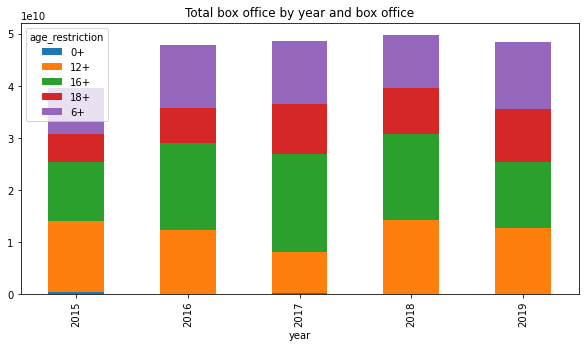

In [46]:
df_age_year = df.query('year > 2014').pivot_table(index = 'age_restriction', columns = 'year', values = 'box_office', aggfunc = sum)
df_age_year.T.plot.bar(stacked=True, figsize = (10, 5), title = 'Total box office by year and box office')
df_age_year.columns = ['2015 sum', '2016 sum', '2017 sum', '2018 sum', '2019 sum']

for y in range(2015, 2020):
    name1 = str(y) + ' %'
    name2 = str(y) + ' sum'
    df_age_year[name1] = df_age_year[name2] / df_age_year[name2].sum() * 100
    
df_age_year = df_age_year[['2015 sum', 
                           '2015 %', 
                           '2016 sum', 
                           '2016 %',
                           '2017 sum', 
                           '2017 %',
                           '2018 sum', 
                           '2018 %',
                           '2019 sum', 
                           '2019 %']]
df_age_year

- The 6+ restriction turned out to be the most stable category. Since 2016, fees have never fallen below 10 billion and they have been at the level of 10-12 billion throughout the years.
- 18+ films are steadily growing from 5 billion in 2015 to 10 billion in 2019
- The box office of 0+ films, on the contrary, is steadily falling. From almost 400 million in 2015 to 17 million in 2019
- Films with 12+ restriction have a more or less stable box office of 12 - 14 billion a year, with the exception of 2017, where the amount is 7 billion
- Films in the 16+ category had the highest box office in the period from 2016 to 2018, while this category showed the largest figure of the entire data sample of almost 19 billion in 2017. Perhaps we are dealing with a series like The Avengers or The Pirates of the Caribbean where one of the films had received a different age restriction than usual

### Conclusion

- Most rental certificates were issued in 2010, the least in 2017
- Since 2014, a jump in the quality of film data is obvious, more than half of the rentals in the range from 2015 to 2019 have complete data, until 2015 this figure is less than 25%
- It seems that somewhere during 2014 there was a change in the way information was collected and data that was indicated in thousands began to be indicated in numbers
- The economic efficiency of rolled products can be graded as follows:

1st place 2017

2nd place 2018

3rd place 2016 and 2019

4th place 2015
- The maximum amount of box office was observed in 2018, 49.6 billion, and the minimum in 2015, 39.5 billion
- From 2015 to 2019, films with a 16+ age restriction have collected the most - 76 billion or 32% of total, and films with a 0+ limit had only 0.3%. Films rated 6+ and 12+ have similar box office numbers of 24% and 26% respectively. Movies rated 18+ made 17.4% or 40 billion.
- The category 6+ turned out to be the most stable category. Since 2016, fees have never fallen below 10 billion and they have been at the level of 10-12 billion throughout the years.
- 18+ films are steadily growing from 5 billion in 2015 to 10 billion in 2019
- The box office of 0+ films, on the contrary, is steadily falling. From almost 400 million in 2015 to 17 million in 2019
- Films in the 12+ category have a more or less stable figure of 12 - 14 billion a year, with the exception of 2017, where the figure is 7 billion
- Films in the 16+ category had the highest box office in the period from 2016 to 2018, while this category showed the largest figure of the entire sample of almost 19 billion in 2017. Perhaps we are dealing with a series like The Avengers or The Pirates of the Caribbean where one of the films received a different age restricion than usual

## Films that received government support

### Additional data processing

In [47]:
df_mk = df[df['budget'].notna()].copy()
df_mk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  332 non-null    object        
 1   puNumber               332 non-null    object        
 2   show_start_date        332 non-null    datetime64[ns]
 3   type                   332 non-null    object        
 4   film_studio            332 non-null    object        
 5   production_country     332 non-null    object        
 6   director               332 non-null    object        
 7   producer               332 non-null    object        
 8   age_restriction        332 non-null    object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  r

Let's start with a research by years. We know that between 2010 and 2014 the data is most likely corrupted

In [48]:
df_mk.year.value_counts()

2015    86
2019    70
2016    61
2018    56
2017    41
2014    16
2013     2
Name: year, dtype: int64

Only 18 films in 2013 and 2014. Let's get rid of them and continue the analysis

In [49]:
df_mk = df_mk.query('year > 2014')

In this study, we are interested in films, not rental certificates. Let's see if there are duplicates in the list

In [50]:
df_mk.title.value_counts()

The Secret of the Sukharev Tower. Wizard of Balance    1
Anna's War                                             1
Movie almanac "Witnesses"                              1
Two                                                    1
MY LIFE                                                1
                                                      ..
autumn memory                                          1
Tomorrow morning                                       1
Secret of the Snow Queen                               1
I can knit                                             1
(Not) perfect man                                      1
Name: title, Length: 314, dtype: int64

No duplicates found. Let's add columns with profit and profitability and remove the others

In [51]:
df_mk['profit'] = df_mk['box_office'] - df_mk['budget']
df_mk['profit%'] = df_mk['profit'] / df_mk['box_office'] * 100
df_mk = df_mk.drop(columns = ['puNumber', 'show_start_date', 'genres', 'director', 'production_country'])
df_mk.head(5)

,title,type,film_studio,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year,main_genre,main_director,support_ratio,profit,profit%
1854,The Secret of the Sukharev Tower. Wizard of Ba...,Animated,"OOO ""Studio ""Master-Film""",A. Gerasimov,6+,0.0,"25,000,000.0","51,850,000.0",Ministry of Culture,6.1,"15,078,858.6",2015,cartoon,S.Seregin,48.2,"-36,771,141.4",-243.9
1870,And the dawns here are quiet..._,Art,"LLC ""Company ""Real-Dakota""",no_info,12+,"50,000,000.0","100,000,000.0","220,588,394.0",Cinema Fund,8.5,"249,166,767.7",2015,drama,R. Davletyarov,68.0,"28,578,373.7",11.5
1903,Ghost_.,Art,Hydrogen 2011 LLC,S.Selyanov,6+,0.0,"75,000,000.0","139,551,503.0",Cinema Fund,7.0,"352,804,320.4",2015,thriller,A. Voitinsky,53.7,"213,252,817.4",60.4
1912,Witch .,Art,"LLC ""Film Company ""Rakurs""",V. Sidorenko,16+,0.0,"34,000,000.0","48,571,430.0",Ministry of Culture,7.4,"51,907.5",2015,fantasy,D. Fedorov,70.0,"-48,519,522.5","-93,473.0"
2058,Duxless 2,Art,"""Slovo Film Studio"" LLC, ""Art Pictures Studio""...","P. Anurov, F. Bondarchuk, D. Rudovsky",16+,0.0,"75,000,000.0","75,000,000.0",Cinema Fund,6.6,"446,163,511.0",2015,drama,R. Prygunov,100.0,"371,163,511.0",83.2


### Exploratory analysis

From the the films effectiveness point of view, we may be interested in the following indicators:
- Amount of revenue (box office)
- Amount of expenses (budget)
- Amount of profit
- Average rating
- Number of films

In [52]:
df_mk.pivot_table(index = 'year',
                  values = ['box_office', 'budget', 'profit', 'ratings', 'title'],
                  margins = True,
                  margins_name = 'TOTAL',
                  aggfunc = {
                      'box_office': sum,
                      'budget': sum,
                      'profit': sum,
                      'ratings': 'mean',
                      'title': 'count'
                  })

,box_office,budget,profit,ratings,title
year,,,,,
2015,"5,785,285,418.1","7,738,669,207.0","-1,911,384,804.9",6.1,86
2016,"6,081,707,839.1","7,554,942,748.0","-1,454,528,828.9",5.7,61
2017,"10,865,075,301.0","7,057,172,568.0","3,913,502,733.0",6.0,41
2018,"9,934,069,010.2","7,000,664,099.0","2,933,404,911.2",6.0,56
2019,"8,409,627,454.6","12,722,866,609.0","-2,825,446,437.4",6.2,70
TOTAL,"39,592,908,318.4","39,368,700,974.0","224,207,344.4",6.0,284


As can be seen, only 2017 and 2018 showed a profit, the rest were unprofitable. Total profit result for the entire period, is close to zero, profitability below 1%. The average rating of films is kept at the level of 6 out of 10 for the entire period. Most films were supported in 2015, the same year there is the largest loss, the least in 2017 and the same year there is the largest profit.

Let's look at efficiency in terms of funding sources

In [53]:
df_mk.pivot_table(index = 'financing_source',
                  values = ['box_office', 'budget', 'profit', 'ratings', 'title'],
                  margins = True,
                  margins_name = 'TOTAL',
                  aggfunc = {
                      'box_office': sum,
                      'budget': sum,
                      'profit': sum,
                      'ratings': 'mean',
                      'title': 'count'
                  })

,box_office,budget,profit,ratings,title
financing_source,,,,,
Cinema Fund,"35,062,356,033.4","28,760,811,053.0","7,395,692,482.4",5.8,140
Ministry of Culture,"5,311,155,868.1","11,040,693,528.0","-5,169,587,380.9",6.1,155
"Ministry of Culture, Cinema Fund","702,253,121.6","2,272,810,650.0","-1,570,557,528.4",6.4,19
TOTAL,"39,592,908,318.4","39,368,700,974.0","224,207,344.4",6.0,284


The Cinema Fund and the Ministry of Culture subsidized approximately the same number of films between 2015 and 2019. At the same time, films that received support from the Ministry of Culture have a slightly higher average rating - 6.1, while they are very unprofitable - 5 billion box office against 11 billion budget (expenditures).

Films supported by the Cinema Fonod have an average rating of 5.8, while their economic efficiency is much higher. Such films have earned 7.4 billion for all time, which is 21% of total.

Let's make a top 10 list of the most successful films in terms of profit and average movie rating

In [54]:
print('Top-10 by the revenue')
display(df_mk.sort_values(by = 'profit', ascending = False).head(10))
print('Top-10 by the raiting')
df_mk.sort_values(by = 'ratings', ascending = False).head(10)

Top-10 by the revenue


,title,type,film_studio,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year,main_genre,main_director,support_ratio,profit,profit%
7456,serf,Art,"LLC ""MEM-MEDIA"" by order of JSC ""WBD Group""","E. Iloyan, D. Zhalinsky, V. Dusmukhametov, T. ...",12+,"25,000,000.0","35,000,000.0","160,000,000.0",Cinema Fund,6.8,"3,073,568,690.8",2019,comedy,K. Shipenko,37.5,"2,913,568,690.8",94.8
5653,Upward movement,Art,"OOO ""Studio ""TRITE"" by Nikita Mikhalkov""","L.Vereshchagin, A.Zlatopolsky, N.Mikhalkov, St...",6+,0.0,"400,000,000.0","590,192,191.0",Cinema Fund,7.5,"2,779,686,144.0",2017,sports,A. Megerdichev,67.8,"2,189,493,953.0",78.8
6549,T-34,Art,"MARS-Film Film Company LLC, commissioned by MM...","A. Zlatopolsky, R. Dishdishyan, L. Blavatnik, ...",12+,"60,000,000.0","120,000,000.0","563,784,717.0",Cinema Fund,6.5,"2,271,754,004.5",2018,drama,A.Sidorov,31.9,"1,707,969,287.5",75.2
5505,The last hero,Art,"Slovo Film Studio LLC, commissioned by Walt Di...","E. Iloyan, D. Zhalinsky, M. Ozkan, A. Trotsyuk...",12+,"50,000,000.0","50,000,000.0","352,477,575.0",Cinema Fund,6.8,"1,655,037,688.0",2017,comedy,D.Dyachenko,28.4,"1,302,560,113.0",78.7
5708,Ice,Art,"""Hydrogen 2011"" LLC, ""Art Pictures Studio"" LLC...","M. Vrubel, A. Andryushchenko, F. Bondarchuk, D...",12+,"25,000,000.0","60,000,000.0","148,585,222.0",Cinema Fund,NaN,"1,445,731,797.9",2018,no_info,O. Trofim,57.2,"1,297,146,575.9",89.7
3565,Attraction (2016),Art,"Hydrogen 2011 LLC, Art Pictures Studio LLC","LLC ""Art Pictures Studio""",12+,0.0,"250,000,000.0","250,000,000.0",Cinema Fund,5.6,"1,038,321,489.0",2016,fiction,F. Bondarchuk,100.0,"788,321,489.0",75.9
2920,Crew.,Art,"OOO ""Studio ""TRITE"" by Nikita Mikhalkov""","L.Vereshchagin, A.Zlatopolsky, N.Mikhalkov, St...",6+,"50,000,000.0","392,104,482.0","635,283,867.0",Cinema Fund,7.6,"1,402,255,390.0",2016,drama,N. Lebedev,69.6,"766,971,523.0",54.7
5641,Trees New,Art,"LLC ""TaBBaK""","T. Bekmambetov, G. Strizhevskaya",6+,"50,000,000.0","50,000,000.0","174,381,922.0",Cinema Fund,5.8,"855,451,052.0",2017,comedy,D.Kiselev,57.3,"681,069,130.0",79.6
5659,Three heroes and princess of Egypt,Animated,"OOO ""Animation Film Studio ""Melnitsa""","S. Selyanov, A. Boyarsky",6+,"50,000,000.0",0.0,"174,464,395.0",Cinema Fund,5.5,"759,226,773.0",2017,cartoon,K. Feoktistov,28.7,"584,762,378.0",77.0
2701,The best day,Art,"LLC ""TaBBaK""","T. Bekmambetov, A. Pershin (pseudonym Zh. Kryz...",16+,"29,000,000.0","34,000,000.0","130,619,336.0",Cinema Fund,4.7,"683,029,061.4",2015,comedy,A. Pershin (pseudonym Zh. Kryzhovnikov),48.2,"552,409,725.4",80.9


Top-10 by the raiting


,title,type,film_studio,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year,main_genre,main_director,support_ratio,profit,profit%
3627,BIG,Art,"CJSC ""PRODUCTION COMPANY OF VALERY TODOROVSKOY""","V. Todorovsky, A. Zlatopolsky",12+,"10,000,000.0","200,000,000.0","320,000,000.0",Cinema Fund,8.5,"228,578,204.0",2016,crime,V.Todorovsky,65.6,"-91,421,796.0",-40.0
1870,And the dawns here are quiet..._,Art,"LLC ""Company ""Real-Dakota""",no_info,12+,"50,000,000.0","100,000,000.0","220,588,394.0",Cinema Fund,8.5,"249,166,767.7",2015,drama,R. Davletyarov,68.0,"28,578,373.7",11.5
6855,Billion,Art,"LLC ""Media Universal Event""","V. Maslov, V. Vereshchagin, B. Anisimov",12+,0.0,"140,000,000.0","240,041,307.0",Cinema Fund,8.2,"408,646,665.7",2019,drama,R. Prygunov,58.3,"168,605,358.7",41.3
7180,Baikal - Heart of the World 3D,Documentary,"LLC ""Producer Center ""New Time""","I.Dobrovolsky, A.Razuvaeva, Y.Perkul",0+,0.0,"3,000,000.0","33,000,000.0",Ministry of Culture,8.0,NaN,2019,family,A. Popova,9.1,NaN,NaN
3782,Butterfly.,Art,"LLC ""Film Company KIT""","E. Babenko, V. Remizov",18+,"7,346,881.0","30,000,000.0","63,170,000.0","Ministry of Culture, Cinema Fund",8.0,"410,058.0",2017,drama,K. Khudyakov,59.1,"-62,759,942.0","-15,305.1"
2482,One day._,Art,"LLC ""Company ""REAL-DAKOTA"", NP ""Interfest""","R. Davletyarov, A. Kotelevsky",16+,0.0,"97,000,000.0","156,360,666.0",Cinema Fund,7.9,"12,748,398.3",2015,drama,R. Davletyarov,62.0,"-143,612,267.7","-1,126.5"
7254,Hero,Art,"LLC ""Cargo""",K. Hovhannisyan,12+,"20,000,000.0","100,000,000.0","250,000,000.0",Cinema Fund,7.9,"172,871,342.0",2019,fantasy,K. Hovhannisyan,48.0,"-77,128,658.0",-44.6
3657,Simple Story.,Art,"OOO ""KINOBYURO""",Y. Bakhshiev,16+,0.0,"64,000,000.0","180,000,000.0",Cinema Fund,7.8,"58,720.0",2016,drama,V.Tatarsky,35.6,"-179,941,280.0","-306,439.5"
7322,Success,Art,"LLC ""Kinodom""","S.Bobza, G.Malkov, V.Polyakov, M.Kuchment",12+,"5,000,000.0","20,000,000.0","75,000,000.0",Cinema Fund,7.8,"3,181,218.0",2019,drama,P. Ruminov,33.3,"-71,818,782.0","-2,257.6"
2472,Warrior (2015),Art,"OOO ""Forpost Production"", OOO ""Art Pictures St...","LLC ""Art Pictures Studio""",12+,"10,000,000.0","70,000,000.0","80,000,000.0",Cinema Fund,7.8,"196,572,438.4",2015,action,A.Andrianov,100.0,"116,572,438.4",59.3


In both lists, the top 3 films are supported by the Cinema Fund. In the top 10 list by revenue there are no films supported by the Ministry of Culture. In the top 10 list by rating, only one film is supported by the Ministry of Culture, and another one has joint support.

In the top 10 by revenue, films in the comedy genre are most often found, in the top 10 by rating - dramas.

Let's examine the data for correlations.

,budget,box_office,ratings,profit
budget,1.0,0.4,0.1,-0.2
box_office,0.4,1.0,0.2,0.8
ratings,0.1,0.2,1.0,0.1
profit,-0.2,0.8,0.1,1.0


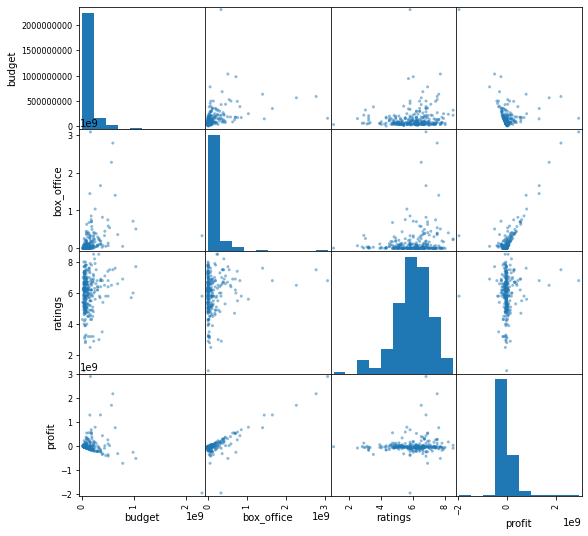

In [55]:
display(df_mk[['budget', 'box_office', 'ratings', 'profit']].corr())
pd.plotting.scatter_matrix(df_mk[['budget', 'box_office', 'ratings', 'profit']], figsize=(9, 9)) 
plt.show()

No significant correlation was found between the data. The fact that the rating has nothing to do with the box office and profit of the film is important. The higher the fees, the higher the profit, this is the expected output.

Let's look at what type and genre is most often found in the sample.

In [56]:
print('Film types')

df_type = df_mk.pivot_table(index = 'type', values = ['box_office', 'budget', 'profit', 'title', 'ratings'], aggfunc = {
    'box_office': sum,
    'budget': sum,
    'profit': sum,
    'ratings': 'mean',
    'title': 'count'
})
df_type['profit%'] = df_type['profit'] / df_type['box_office'] * 100
df_type['count_ratio'] = df_type['title'] / df_type['title'].sum() * 100
display(df_type.sort_values(by = 'title', ascending = False))

print()

df_genre = df_mk.pivot_table(index = 'main_genre', values = ['box_office', 'budget', 'profit', 'title', 'ratings'], aggfunc = {
    'box_office': sum,
    'budget': sum,
    'profit': sum,
    'ratings': 'mean',
    'title': 'count'
})
df_genre['profit%'] = df_genre['profit'] / df_genre['box_office'] * 100
df_genre['count_ratio'] = df_genre['title'] / df_genre['title'].sum() * 100

print('Film genres')
df_genre.sort_values(by = 'title', ascending = False)

Film types


,box_office,budget,profit,ratings,title,profit%,count_ratio
type,,,,,,,
Art,"35,765,961,720.5","36,384,380,920.0","983,972,501.5",6.0,283,2.8,90.1
Animated,"5,309,803,302.6","5,656,934,311.0","-328,424,928.4",5.7,30,-6.2,9.6
Documentary,0.0,"33,000,000.0",0.0,8.0,1,NaN,0.3



Film genres


,box_office,budget,profit,ratings,title,profit%,count_ratio
main_genre,,,,,,,
drama,"9,393,990,547.8","10,487,189,856.0","-796,165,159.2",6.4,85,-8.5,27.1
comedy,"12,060,398,000.3","5,822,251,639.0","6,388,293,863.3",5.5,71,53.0,22.6
cartoon,"5,308,524,288.2","5,563,009,896.0","-235,779,527.8",5.8,30,-4.4,9.6
fantasy,"1,156,182,549.7","3,794,561,187.0","-1,694,378,637.3",6.3,16,-146.5,5.1
no_info,"1,481,720,584.6","1,044,788,062.0","484,666,572.6",NaN,15,32.7,4.8
thriller,"700,450,190.1","1,350,960,940.0","-650,510,749.9",5.7,15,-92.9,4.8
melodrama,"44,000,699.1","881,745,834.0","-776,745,134.9",5.8,13,"-1,765.3",4.1
horror,"710,123,189.4","563,877,625.0","146,245,564.4",5.2,10,20.6,3.2
military,"1,017,670,471.8","1,285,906,825.0","-268,236,353.2",6.5,9,-26.4,2.9


Comedies have the lowest (second from the bottom) rating and the highest profits and revenues. Comedies also make up 22.6% of all supported films. Dramas are unprofitable, but have a rating slightly above the average, and drama is the most frequently occurring genre in the sample - 27.1%. There are only three films supported in the sports genre and all of them have proved to be extremely successful both in terms of profits and ratings.

Art films are the most common, making up 90% of the entire sample. Animated films are slightly less than 10% and their performance is below average, they are unprofitable and have a rating below average - 5.7

### Conclusion

- Only 2017 and 2018 showed a profit, the rest were unprofitable. Total profit result for the entire period, is close to zero, profitability below 1%.
- The average film rating is kept at the level of 6 out of 10 for the entire period. Most films were supported in 2015, the same year there is the largest loss, the least in 2017 and the same year there is the largest profit.
- The Cinema Fund and the Ministry of Culture subsidized approximately the same number of films from 2015 to 2019. At the same time, films that received support from the Ministry of Culture have a slightly higher average rating - 6.1, while they are very unprofitable - 5 billion box office against 11 billion of the budget (expenditures).
- Films supported by the Cinema Fund have an average rating of 5.8, while their economic efficiency is much higher. Such films have earned 7.4 billion in profits for all time, which is 21% of the total
- There are no films supported by the Ministry of Culture in the top 10 list by profit. In the top 10 list by rating only one film is supported by the Ministry of Culture, and another one has joint support.
- In the top 10 by profit, films in the comedy genre are most often found, in the top 10 by rating - dramas.
- No significant correlation was found between the data. The rating has nothing to do with the box office and profit of the film.
- The smallest (second from the bottom) rating and the highest profits and revenues are seen for comedies. Comedies also make up 22.6% of all supported films.
- Dramas are unprofitable, but they have a rating slightly above the average, and drama is the most common genre in the sample - 27.1%.
- There are only three films supported in the sports genre and all of them have been extremely successful both in terms of profits and in terms of ratings.
- Feature films are the most common, 90% of the entire sample. Animated films are slightly less than 10% and their performance is below average, they are unprofitable and have a rating below average - 5.7

## Research results

**Important information:**
- Apparently, the data before 2014 is corrupted. Only 25% of films have full release information versus 50% for films after 2014. Also, apparently, different methods were used to take into account the fees, until 2014, the fees were indicated in thousands, after that in numbers. Most of the analysis is based on data from 2015 to 2019

**Study of the entire sample:**
- Most rental certificates were issued in 2010, the least in 2017
- The economic efficiency of rolled products can be graded as follows:

1st place 2017

2nd place 2018

3rd place 2016 and 2019

4th place 2015
- The maximum amount of fees was observed in 2018, 49.6 billion, and the minimum in 2015, 39.5 billion
- From 2015 to 2019, films with a 16+ age restriction have collected the most - 76 billion or 32% of all box office, and films with a 0+ restriction only 0.3%. Films rated 6+ and 12+ have similar box office numbers of 24% and 26% respectively. Movies rated 18+ made 17.4% or 40 billion.
- The category 6+ turned out to be the most stable. Since 2016, fees have never fallen below 10 billion and they have been at the level of 10-12 billion throughout the years.
- 18+ films are steadily growing from 5 billion in 2015 to 10 billion in 2019
- The box office of 0+ films, on the contrary, is steadily falling. From almost 400 million in 2015 to 17 million in 2019
- Films in the 12+ category have a more or less stable figure of 12 - 14 billion a year, with the exception of 2017, where the figure is 7 billion
- Films in the 16+ category had the highest box office in the period from 2016 to 2018, while this category showed the largest figure of the entire sample of almost 19 billion in 2017. Perhaps we are dealing with a series like The Avengers or The Pirates of the Caribbean where one of the films received a different age restriction than usual

**Study of supported films:**
- Only 2017 and 2018 showed a profit, the rest were unprofitable. Total profit result for the entire period, is close to zero, profitability below 1%.
- The average film rating is kept at the level of 6 out of 10 for the entire period. Most films were supported in 2015, the same year there is the largest loss, the least in 2017 and the same year there is the largest profit.
- The Cinema Fund and the Ministry of Culture subsidized approximately the same number of films from 2015 to 2019. At the same time, films that received support from the Ministry of Culture have a slightly higher average rating - 6.1, while they are very unprofitable - 5 billion box office against 11 billion of the budget (expenditures).
- Films supported by the Cinema Fund have an average rating of 5.8, while their economic efficiency is much higher. Such films have earned 7.4 billion in profits for all time, which is 21% of the total
- There are no films supported by the Ministry of Culture in the top 10 list by profit. In the top 10 list by rating only one film is supported by the Ministry of Culture, and another one has joint support.
- In the top 10 by profit, films in the comedy genre are most often found, in the top 10 by rating - dramas.
- No significant correlation was found between the data. The rating has nothing to do with the box office and profit of the film.
- The smallest (second from the bottom) rating and the highest profits and revenues are seen for comedies. Comedies also make up 22.6% of all supported films.
- Dramas are unprofitable, but they have a rating slightly above the average, and drama is the most common genre in the sample - 27.1%.
- There are only three films supported in the sports genre and all of them have been extremely successful both in terms of profits and in terms of ratings.
- Feature films are the most common, 90% of the entire sample. Animated films are slightly less than 10% and their performance is below average, they are unprofitable and have a rating below average - 5.7